In [221]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np

In [222]:
data = pd.read_excel("..\Data\Combined.xlsx")

df = pd.DataFrame(data)
data.shape
df= df.head(500)

In [223]:
column_translation = {
    'Источник': 'source',
    'Название': 'title',
    'Тип': 'type',
    'Санузел': 'bathroom',
    'Тип постройки': 'building_type',
    'Материал': 'material',
    'Широта': 'lat',
    'Долгота': 'long',
    'Район': 'district',
    'Этаж': 'floor',
    'Этажность': 'num_of_floors',
    'Ремонт': 'renovation',
    'Площадь': 'area',
    'Количество комнат': 'num_of_rooms',
    'Дата публикации': 'publication_date',
    'Валюта': 'currency',
    'Цена': 'price',
    'Дата создания': 'created_date'
}

df = df.rename(columns=column_translation)

df = df[['source', 'type', 'building_type',
       'lat', 'long', 'district', 'floor', 'num_of_floors', 'renovation',
       'area', 'num_of_rooms', 'publication_date', 'currency', 'price']]

In [224]:
init_len = len(df)

subset_columns = ['type', 'building_type', 'district', 'floor', 'num_of_floors', 'renovation',
         'area', 'num_of_rooms']

df = df.drop_duplicates(subset=subset_columns)

after_len = len(df)
print("Number of duplicates removed:", init_len - after_len)

Number of duplicates removed: 82


In [225]:
usd_mask = df['currency'] == "USD"
df.loc[usd_mask, 'price'] *= 12500
df.loc[usd_mask, 'currency'] = "UZS"

In [226]:
df['publication_date'] = pd.to_datetime(df['publication_date'], format='%d.%m.%Y')
df['year'] = df['publication_date'].dt.year
df['year'] = df['year'].fillna(np.nan).astype(float).astype('Int64')

In [227]:
df = df[['source', 'type', 'building_type',
       'lat', 'long', 'district', 'floor', 'num_of_floors', 'renovation',
       'area', 'num_of_rooms', 'currency', 'price', 'year']]

In [228]:
district_borders = gpd.read_file('C:/Users/dilmu/OneDrive/Desktop/Project/data_scrapping/Data Scrapping/Data/district_borders.json')
df['geometry'] = df.apply(lambda row: Point(row['long'], row['lat']), axis=1)
gdf = gpd.GeoDataFrame(df, geometry='geometry')
joined = gpd.sjoin(gdf, district_borders, how="left", op='within')
df['district'] = df['district'].fillna(joined['NOMI'])
df.drop(columns=['geometry'], inplace=True)

C:\Users\dilmu\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\dilmu\AppData\Local\Temp\ipykernel_6564\3951692619.py:4: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  joined = gpd.sjoin(gdf, district_borders, how="left", op='within')


In [229]:
rating = {
    "Алмазарский район": 3,
    "Бектемирский район": 9,
    "Мирабадский район": 2,
    "Мирзо-Улугбекский район": 8,
    "Сергелийский район": 11,
    "Учтепинский район": 1,
    "Чиланзарский район": 5,
    "Шайхантахурский район": 4,
    "Юнусабадский район": 7,
    "Яккасарайский район": 9,
    "Яшнабадский район": 6,
    "Янгихаётский район": 12
}

df["district"] = df["district"].map(rating)

In [230]:
df['type'] = df['type'].str.lower()

corrections = {
    'квартира': 'квартира',
    'квартира': 'квартира',
    'частный дом': 'частный',
    'земля': 'частный',
    'участок': 'частный',
    'евро дом': 'частный',
    'дом': 'частный',
    'частный дом на продажу':'частный',
    'квартира во вторичке на продажу': 'квартира',
    'квартира в новостройке на продажу': 'квартира',
    'дача на продажу': 'частный',
}                                       

df['type'].replace(corrections, inplace=True)

C:\Users\dilmu\AppData\Local\Temp\ipykernel_6564\241215034.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['type'].replace(corrections, inplace=True)


In [231]:
df['building_type'] = df['building_type'].str.lower()

corrections = {
    'Новострой': 'первичный',
    'Вторичный': 'вторичный',
    'Вторичка': 'вторичный',
    'Вторичный рынок': 'вторичный',
    'Новостройки': 'первичный',
    'Первичный': 'первичный',
    'вторичный': 'вторичный',
    'Новостройка': 'первичный',
    'первичный': 'первичный',
    'первычный': 'первичный',
    'Вторичний':  'вторичный',
    'торичный': 'вторичный',
    'Вторичные': 'вторичный',
    'Вторичный': 'вторичный',
    'вторичный рынок': 'вторичный',
    'новостройка': 'первичный',
    'новостройки': 'первичный',
    'новострой': 'первичный',
    'вторичка': 'вторичный',
}

df['building_type'].replace(corrections, inplace=True)

C:\Users\dilmu\AppData\Local\Temp\ipykernel_6564\3370676702.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['building_type'].replace(corrections, inplace=True)


In [232]:
df['renovation'] = df['renovation'].str.lower()

corrections = {
    'евро ремонт': 'евроремонт',
    'квро ремонт': 'евроремонт',
    'евро ремонт': 'евроремонт',
    'с ремонтом': 'средний ремонт',
    'требуется ремонт': 'нужен ремонт',
    'требует ремонта': 'нужен ремонт',
    'средняя': 'средний ремонт',
    'среднее состояние': 'средний ремонт',
    'требует ремонта': 'нужен ремонт',
    'незаконченный евроремонт': 'нужен ремонт',
    'требует ремонта':  'нужен ремонт',
    'дизайнерский': 'евроремонт',
    'не требуется': 'средний ремонт',
    'косметический': 'евроремонт',
    'черновая отделка': 'нужен ремонт',
    'коробка': 'нужен ремонт',
    'без ремонта': 'нужен ремонт',
    'капитальный ремонт': 'евроремонт',
}

df['renovation'].replace(corrections, inplace=True)

rating = {
    "евроремонт": 1,
    "средний ремонт": 2,
    "нужен ремонт": 3,
}
df['renovation'] = df['renovation'].map(rating)

C:\Users\dilmu\AppData\Local\Temp\ipykernel_6564\2316523911.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['renovation'].replace(corrections, inplace=True)


In [233]:
df_map = pd.read_excel('..\Data\Map_Data.xlsx')
categories_to_keep = ['Школа', 'Супермаркет', 'Магазин', 'Частная школа', 'Средняя школа', 'Начальная школа',
                      'Международная школа', 'Торговый центр', 'Продовольственный магазин',
                      'Магазин шаговой доступности', 'Супермаркет низких цен', 'Ресторан', 'фастфуд',
                      'Узбекская кухня','Кафе','Суши','Турецкая кухня','Гамбургеры','Корейская кухня','Японская кухня','Еда на вынос','Доставка готовой еды','Парк']

df_map = df_map[df_map['category'].isin(categories_to_keep)]

corrections = {
    'Магазин': 'grocery',
    'Супермаркет': 'grocery',
    'Продовольственный магазин': 'grocery',
    'Магазин шаговой доступности': 'grocery',
    'Супермаркет низких цен': 'grocery',
    'Рынок': 'grocery',
    'Начальная школа': 'school',
    'Частная школа': 'school',
    'Средняя школа': 'school',
    'Школа': 'school',
    'Международная школа': 'school',
    'Торговый центр': 'mall',
    'Парк': 'park',
    'Ресторан':'food', 
    'фастфуд':'food',
    'Узбекская кухня':'food',
    'Кафе':'food',
    'Суши':'food',
    'Турецкая кухня':'food',
    'Гамбургеры':'food',
    'Корейская кухня':'food',
    'Японская кухня':'food',
    'Еда на вынос':'food',
    'Доставка готовой еды':'food',
    'Парк': 'park'
}

df_map['category'].replace(corrections, inplace=True)

df_map.dropna(subset=['category', 'lat', 'long'], inplace=True)

df_map.drop_duplicates(subset=['category', 'lat', 'long'], inplace=True)

C:\Users\dilmu\AppData\Local\Temp\ipykernel_6564\2822163125.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_map['category'].replace(corrections, inplace=True)


In [234]:
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371 
    return c * r

categories = df_map['category'].unique()
for cat in categories:
    df[cat] = 0

for i, row_df in df.iterrows():
    for j, row_map in df_map.iterrows():
        dist = haversine(row_df['lat'], row_df['long'], row_map['lat'], row_map['long'])
        if dist <= 2:
            df.at[i, row_map['category']] += 1


In [235]:
weights = {'district': 1, 'school': 2, 'grocery': 1, 'mall': 1, 'food': 1, 'park': 1}
df['comfortability_index'] = df['district'] * weights['district'] + \
                              df['school'] * weights['school'] + \
                              df['grocery'] * weights['grocery'] + \
                              df['mall'] * weights['mall'] + \
                              df['food'] * weights['food'] + \
                              df['park'] * weights['park']

In [236]:
df = df[df['comfortability_index'] >= 0]

In [237]:
for column in df.columns:
    mode_value = df[column].mode()[0]
    df[column] = df[column].fillna(mode_value)

C:\Users\dilmu\AppData\Local\Temp\ipykernel_6564\4115931288.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].fillna(mode_value)


In [238]:
df_price = pd.read_excel('..\Data\Pricing.xlsx')
df = pd.merge(df, df_price, on=['year', 'type', 'building_type'], how='left')

In [239]:
def remove_outliers(df, column, threshold):
    mean_val = df[column].mean()
    std_val = df[column].std()
    lower_bound = mean_val - threshold * std_val
    upper_bound = mean_val + threshold * std_val
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers(df, 'price', 3)
df = remove_outliers(df, 'num_of_rooms', 3)
df = remove_outliers(df, 'area', 3)
df.reset_index(drop=True, inplace=True)

In [240]:
df = df[['renovation',	'area',	'num_of_rooms', 'comfortability_index', 'by_square_meter', 'price']]

In [241]:
one_hot_encoded = pd.get_dummies(df['renovation'], prefix='renovation')
one_hot_encoded = one_hot_encoded.astype(int)
df = pd.concat([df, one_hot_encoded], axis=1)
df.drop('renovation', axis=1, inplace=True)

In [242]:
from sklearn.preprocessing import StandardScaler
X = df.drop('price', axis=1)
y = df['price']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

df_scaled = pd.concat([X_scaled_df, y], axis=1)

In [243]:
correlation_matrix = df_scaled.corr()

correlation_with_price = correlation_matrix['price']

print(correlation_with_price)

area                   -0.111014
num_of_rooms            0.038007
comfortability_index    0.116832
by_square_meter        -0.207238
renovation_1.0          0.112895
renovation_2.0         -0.082730
renovation_3.0         -0.073715
price                   1.000000
Name: price, dtype: float64


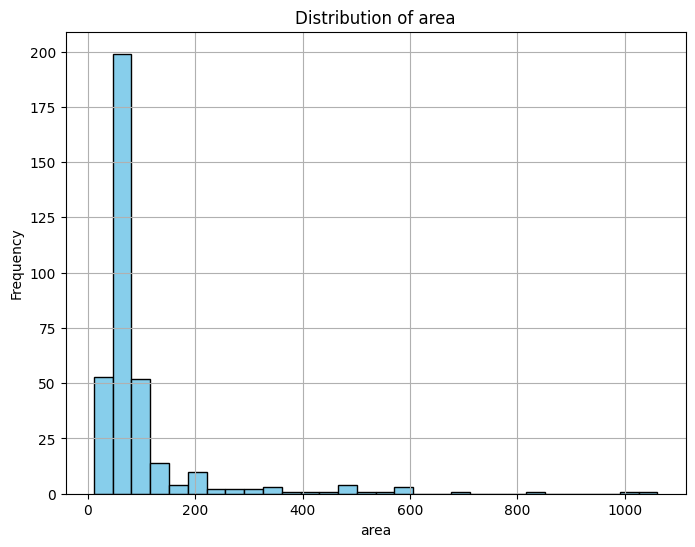

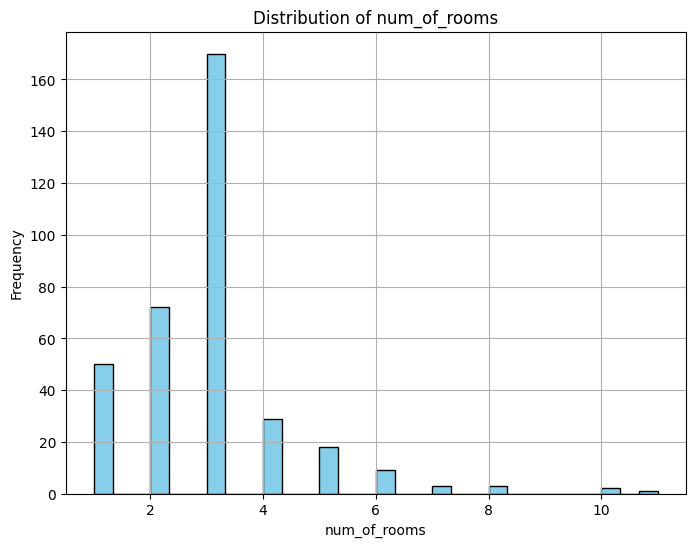

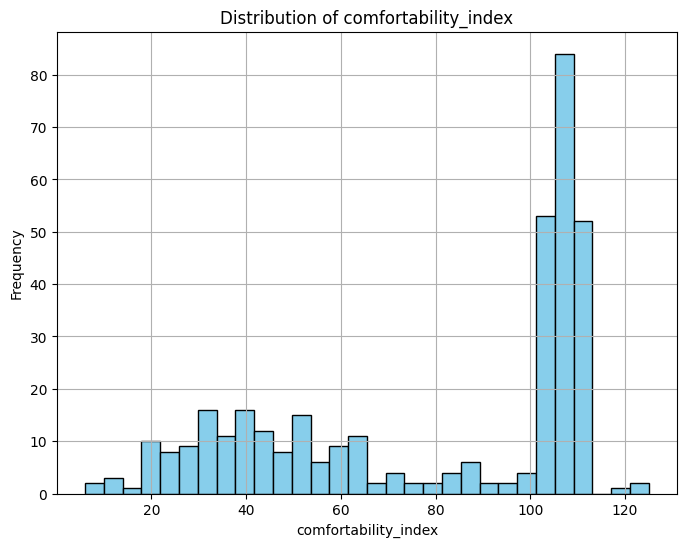

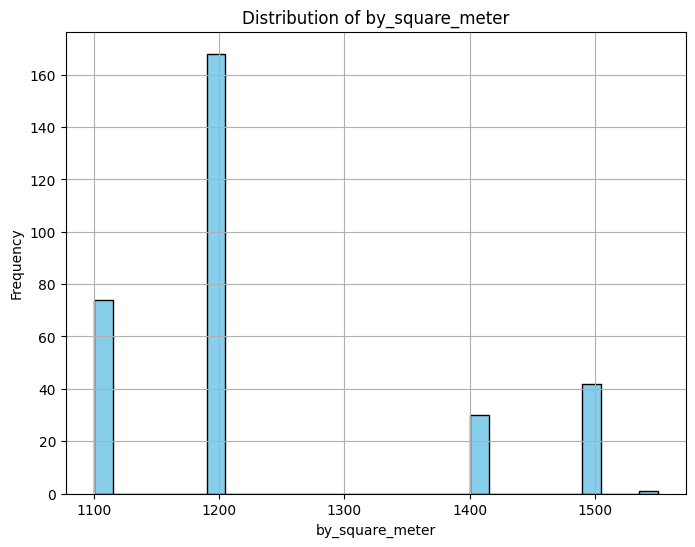

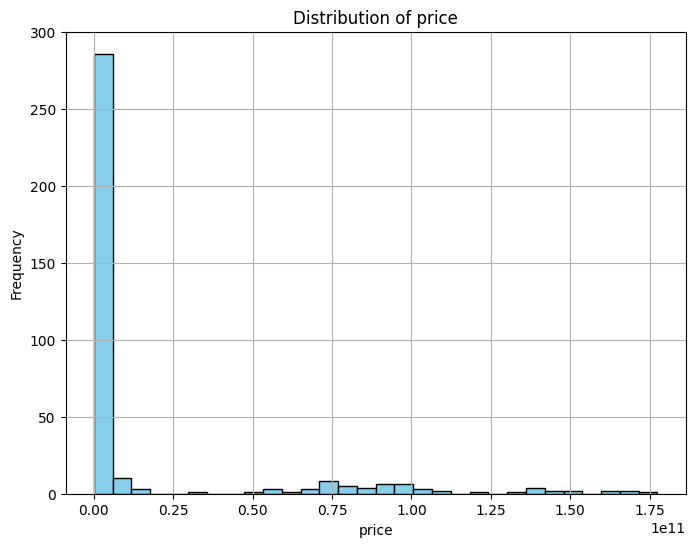

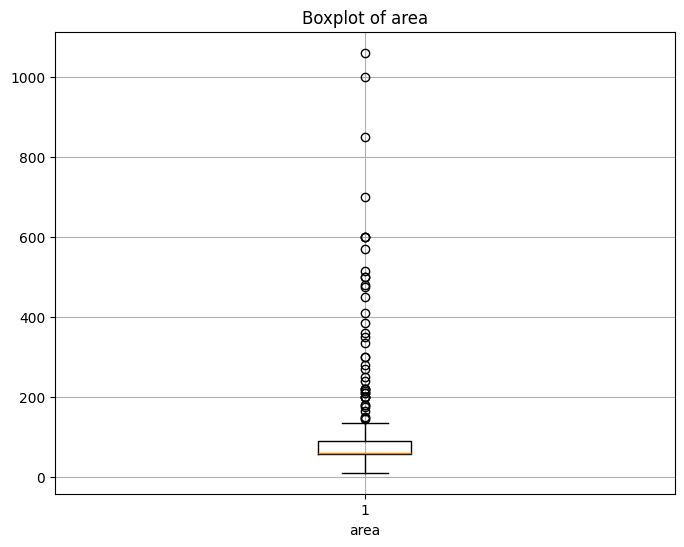

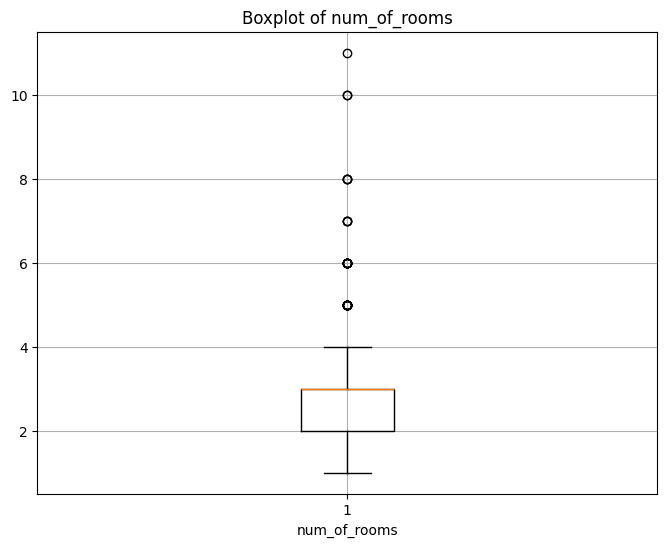

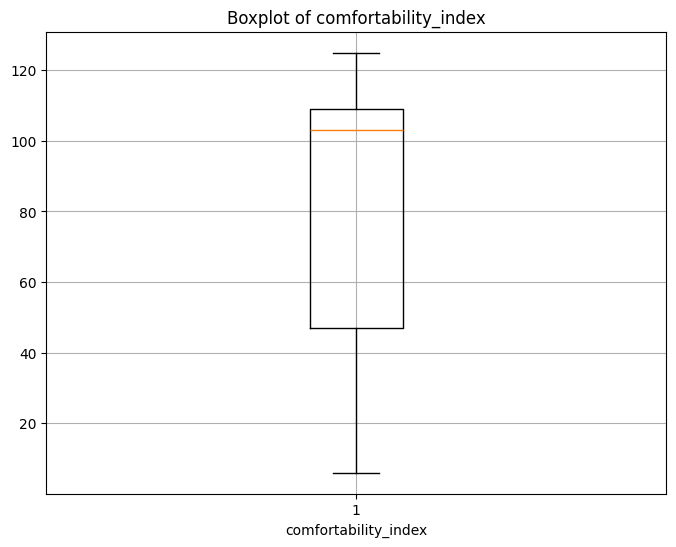

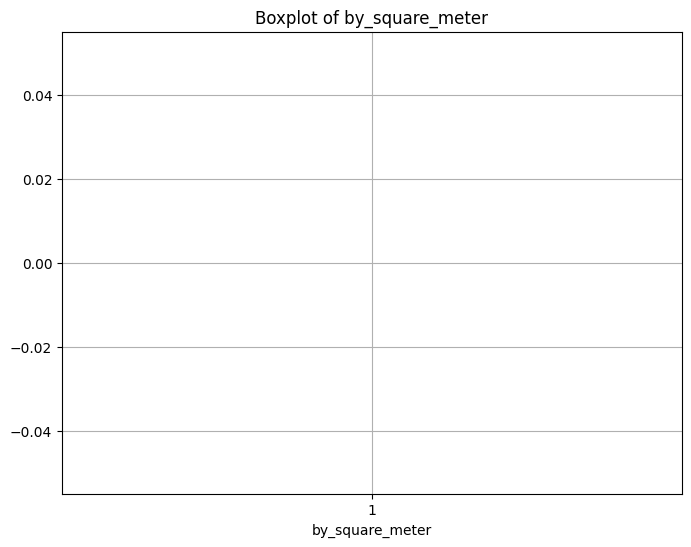

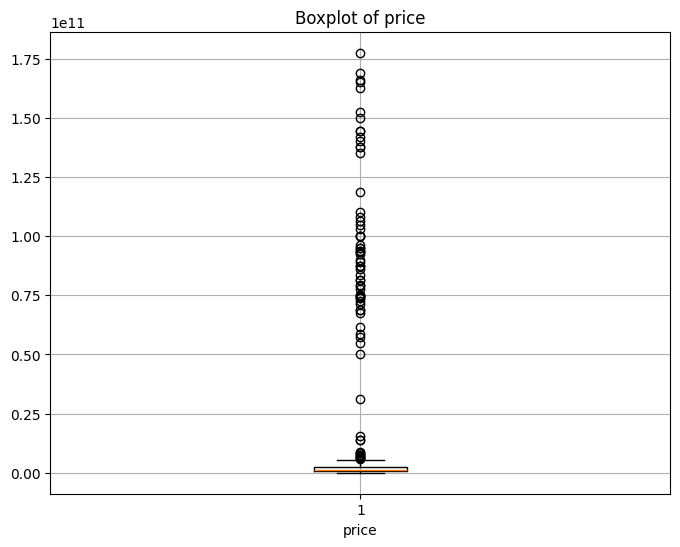

In [244]:
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for each numerical feature
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Plot box plots for each numerical feature
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.grid(True)
    plt.show()


In [245]:
excel_file_path = "..\\Data\\Cleaned_Combined.xlsx"
# existing_data = pd.read_excel(excel_file_path)
# combined_data = pd.concat([existing_data, df])
df.drop_duplicates(keep='first', inplace=True)
df.to_excel(excel_file_path, index=False)